In [ ]:
# @title Libraries and utility functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import math

# Utility functions
def plot_history(history,metric=None):
  fig, ax1 = plt.subplots(figsize=(6, 6)) #figsize=(10,8)

  epoch_count=len(history.history['loss'])

  line1,=ax1.plot(range(1,epoch_count+1),history.history['loss'],label='train_loss',color='orange')
  ax1.plot(range(1,epoch_count+1),history.history['val_loss'],label='val_loss',color = line1.get_color(), linestyle = '--')
  ax1.set_xlim([1,epoch_count])
  ax1.set_ylim([0, max(max(history.history['loss']),max(history.history['val_loss']))])
  ax1.set_ylabel('loss',color = line1.get_color())
  ax1.tick_params(axis='y', labelcolor=line1.get_color())
  ax1.set_xlabel('Epochs')
  _=ax1.legend(loc='lower left')

  if (metric!=None):
    ax2 = ax1.twinx()
    line2,=ax2.plot(range(1,epoch_count+1),history.history[metric],label='train_'+metric)
    ax2.plot(range(1,epoch_count+1),history.history['val_'+metric],label='val_'+metric,color = line2.get_color(), linestyle = '--')
    ax2.set_ylim([0, max(max(history.history[metric]),max(history.history['val_'+metric]))])
    ax2.set_ylabel(metric,color=line2.get_color())
    ax2.tick_params(axis='y', labelcolor=line2.get_color())
    _=ax2.legend(loc='upper right')

def show_confusion_matrix(conf_matrix,class_names,figsize=(6,6)):
  fig, ax = plt.subplots(figsize=figsize)
  img=ax.matshow(conf_matrix)
  tick_marks = np.arange(len(class_names))
  _=plt.xticks(tick_marks, class_names,rotation=45)
  _=plt.yticks(tick_marks, class_names)
  _=plt.ylabel('Real')
  _=plt.xlabel('Predicted')

  for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, '{0:.1%}'.format(conf_matrix[i, j]),
                       ha='center', va='center', color='w')


11490434/11490434 [==============================] - 1s 0us/step
Train shape:  (50000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)
Test shape: (10000, 28, 28, 1) 

Train shape:  (50000, 32, 32, 1)
Validation shape:  (10000, 32, 32, 1)
Test shape:  (10000, 32, 32, 1)


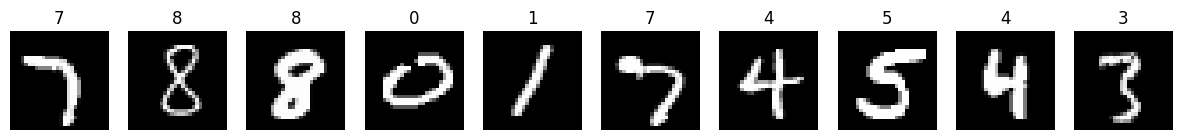

In [ ]:
# @title Data preprocessing
(data_train_x,data_train_y), (data_test_x,data_test_y) = keras.datasets.mnist.load_data()
class_names=range(10) # the 10 digits
class_count=len(class_names) # number of classes

# Visualization of randomly selected images
image_count=10 # quante immagini visualizzare

_, axs = plt.subplots(1, image_count,figsize=(15, 10))
for i in range(image_count):
  random_idx=random.randint(0,data_train_x.shape[0])
  axs[i].imshow(data_train_x[random_idx],cmap='gray')
  axs[i].axis('off')# to delete the number of pixel on the two axis of the images
  #print(random_idx) #indice random tra 0 e 60.000
  #print(data_train_y[random_idx]) #accede alla relativa classe dell'immagine con quell'indice
  axs[i].set_title(class_names[data_train_y[random_idx]])

# Split training,validation sets
val_size=10000

train_x, val_x, train_y, val_y = train_test_split(data_train_x, data_train_y, test_size=val_size, random_state=42,shuffle=True)
train_x=np.array(train_x)
val_x=np.array(val_x)

test_x=data_test_x
test_y=data_test_y

# Preprocessing
if (len(train_x.shape)==3): #3 because we have the number of examples, height and width
  train_x=np.expand_dims(train_x,axis=3)
  val_x=np.expand_dims(val_x,axis=3)
  test_x=np.expand_dims(test_x,axis=3)
  print('Train shape: ',train_x.shape)
  print('Validation shape: ',val_x.shape)
  print(f'Test shape: {test_x.shape} \n')

#Intensity range normalization
train_x=train_x/255
val_x=val_x/255
test_x=test_x/255

# Padding of the images, to be consistent with the originally designed LeNet-5
if train_x.shape[1]<32 or train_x.shape[2]<32: #in train_x.shape[0] we have the number of images
  pad_h=int((32-train_x.shape[1])/2)
  pad_w=int((32-train_x.shape[2])/2)
  train_x=np.pad(train_x,((0,0),(pad_w,pad_w),(pad_h,pad_h),(0,0)),'constant',constant_values=0)
  val_x=np.pad(val_x,((0,0),(pad_w,pad_w),(pad_h,pad_h),(0,0)),'constant',constant_values=0)
  test_x=np.pad(test_x,((0,0),(pad_w,pad_w),(pad_h,pad_h),(0,0)),'constant',constant_values=0)
  print('Train shape: ',train_x.shape)
  print('Validation shape: ',val_x.shape)
  print('Test shape: ',test_x.shape)

Epoch 1/20
200/200 [==============================] - 11s 13ms/step - loss: 0.4593 - accuracy: 0.8698 - val_loss: 0.2274 - val_accuracy: 0.9313
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1845 - accuracy: 0.9445 - val_loss: 0.1379 - val_accuracy: 0.9584
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1208 - accuracy: 0.9642 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0915 - accuracy: 0.9723 - val_loss: 0.0799 - val_accuracy: 0.9765
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.0704 - accuracy: 0.9788 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 6/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0610 - val_accuracy: 0.9823
Epoch 7/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoc

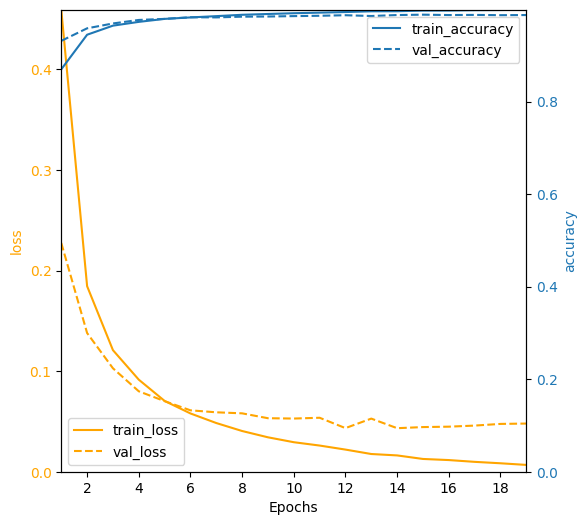

In [ ]:
# Model definition and creation
def build_lenet5(input_shape=(32, 32, 1),output_class_count=10):
    model=keras.Sequential(
            [
                layers.Input(shape=input_shape,name='Input'),
                layers.Conv2D(filters=6, kernel_size=5, strides=1,activation='tanh',padding='valid',name='C1'),
                layers.AvgPool2D(pool_size=2, strides=2,name='S2'),

                layers.Conv2D(filters=16, kernel_size=5,strides=1,activation='tanh',padding='valid',name='C3'),
                layers.AvgPool2D(pool_size=2, strides=2,name='S4'),

                layers.Conv2D(filters=120, kernel_size=5,strides=1,activation='tanh',padding='valid',name='C5'),

                layers.Flatten(), #To obtain a vector
                layers.Dense(84, activation='tanh',name='F6'),
                layers.Dense(units=output_class_count,activation='softmax',name='Output')
            ]
        )
    return model

model=build_lenet5( train_x[0].shape , class_count)

# Model compilation
#optimizer=keras.optimizers.SGD()
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Using Adam optimizer

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
batch_size=250
epoch_count=20
patience=5

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

history =model.fit(train_x,train_y,batch_size,epoch_count,validation_data=(val_x,val_y),callbacks=[early_stop])

#Visualization of accuracy and loss over epochs
plot_history(history,metric='accuracy')


Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0557 - val_accuracy: 0.9831
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0466 - val_accuracy: 0.9874
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0507 - val_accuracy: 0.9875
Epoch 

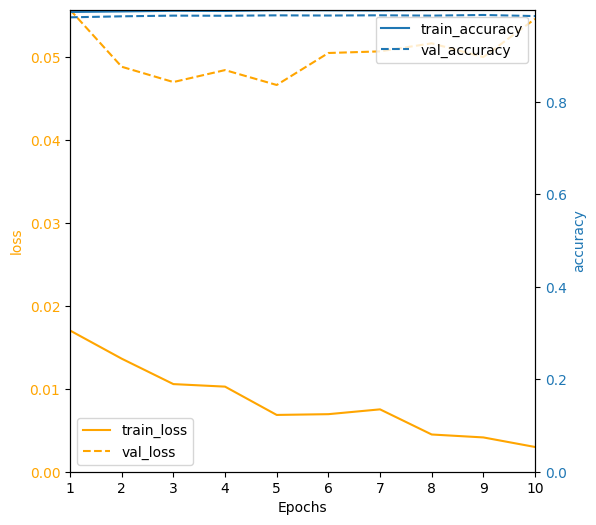

In [ ]:
# I want to perform more epochs
# Model training
batch_size=250
epoch_count=10

history =model.fit(train_x,train_y,batch_size,epoch_count,validation_data=(val_x,val_y))

#Visualization of accuracy and loss over epochs
plot_history(history,metric='accuracy')

Loss: 0.053 Accuracy: 0.986
313/313 [==============================] - 1s 2ms/step


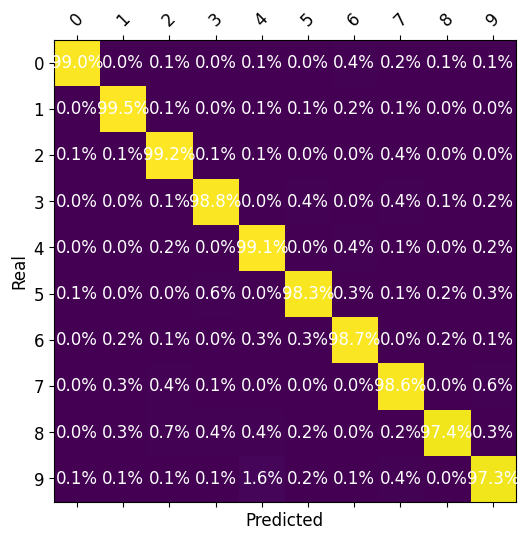

In [ ]:
# Performance evaluation on the test set
results = model.evaluate(test_x, test_y, batch_size=batch_size,verbose=0)
print('Loss: {:.3f} Accuracy: {:.3f}'.format(results[0],results[1]))

test_conf_pred=model.predict(test_x)
test_y_pred=np.argsort(test_conf_pred,axis=1)[:,-1]# to select the class with the highest probability

# Accuracy
correct = np.equal(test_y_pred,test_y)
accuracy=correct.sum()/len(correct)

# Confusion matrix
conf_matrix=confusion_matrix(test_y, test_y_pred, normalize='true')
show_confusion_matrix(conf_matrix,class_names)

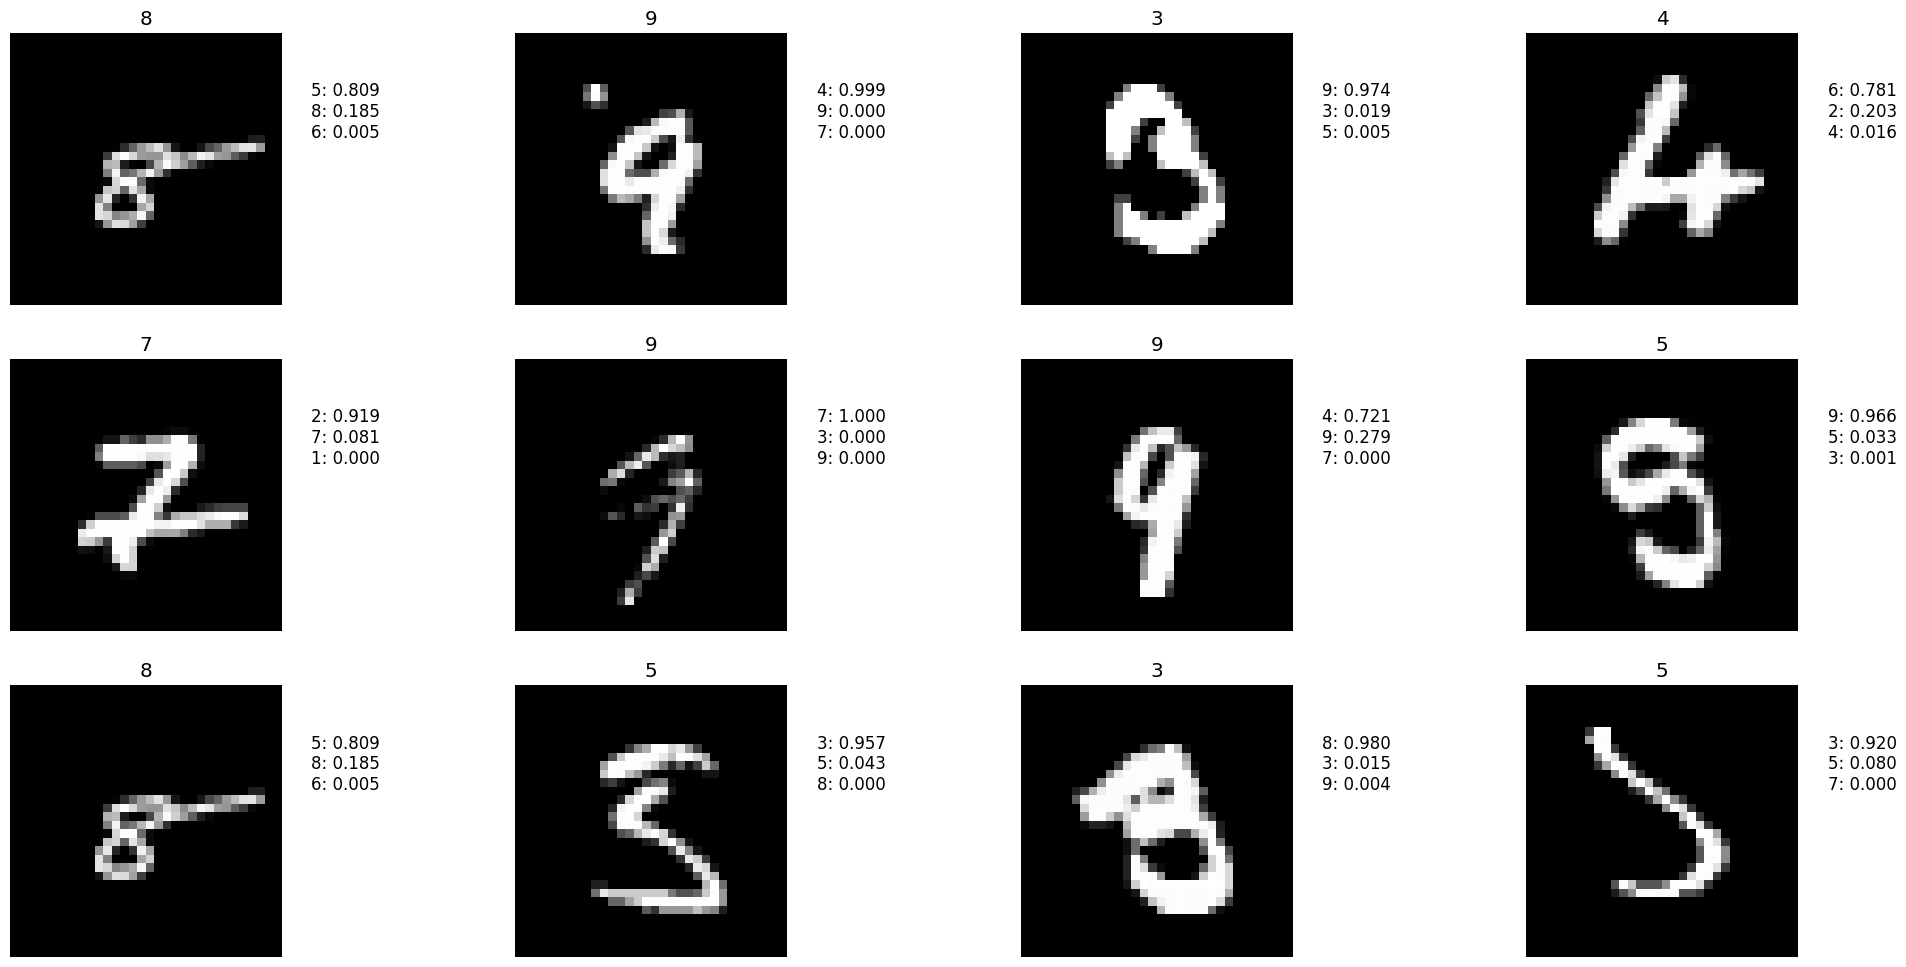

In [ ]:
# Visualization of misclassified images
images_to_show=12

error_indices = np.where(correct == False)[0]

if error_indices.shape[0] > 0:
  image_per_row = 4
  top_class_count = 3

  selected_indices=[]
  for i in range(min(images_to_show,error_indices.shape[0])):
    random_idx=random.randint(0,error_indices.shape[0])
    selected_indices.append(random_idx)
  error_indices=error_indices[selected_indices]

  row_count=math.ceil(len(error_indices)/image_per_row)
  column_count=image_per_row
  plt.rcParams.update({'font.size': 12})
  _, axs = plt.subplots(row_count, column_count,figsize=(25, 4*row_count),squeeze=False)

  for i in range(row_count):
    for j in range(column_count):
      axs[i,j].axis('off')

  for i in range(len(error_indices)):
    q = i // image_per_row
    r = i % image_per_row
    idx = error_indices[i]

    axs[q,r].imshow(test_x[idx].squeeze(),cmap='gray')
    axs[q,r].set_title(class_names[test_y[idx]])

    sorted_conf_indices=np.argsort(test_conf_pred[idx])
    best_indices=sorted_conf_indices[-top_class_count:]

    text=''
    for j in range(len(best_indices)-1,-1,-1):
        text+='{}: {:.3f}\n'.format(class_names[best_indices[j]],test_conf_pred[idx][best_indices[j]])

    axs[q,r].text(35, 10, text, horizontalalignment='left', verticalalignment='center')
plt.show()

# Nelle immagini: in alto ci sono le classi reali
# Nella destra ci sono le probabilità per le diverse classi

Epoch 1/30
200/200 [==============================] - 3s 6ms/step - loss: 0.8458 - accuracy: 0.7909 - val_loss: 0.4486 - val_accuracy: 0.9083
Epoch 2/30
200/200 [==============================] - 1s 5ms/step - loss: 0.5225 - accuracy: 0.8854 - val_loss: 0.3451 - val_accuracy: 0.9320
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3985 - accuracy: 0.9196 - val_loss: 0.2631 - val_accuracy: 0.9565
Epoch 4/30
200/200 [==============================] - 1s 7ms/step - loss: 0.3128 - accuracy: 0.9424 - val_loss: 0.2216 - val_accuracy: 0.9674
Epoch 5/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2706 - accuracy: 0.9529 - val_loss: 0.1984 - val_accuracy: 0.9723
Epoch 6/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2457 - accuracy: 0.9592 - val_loss: 0.1852 - val_accuracy: 0.9739
Epoch 7/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2260 - accuracy: 0.9630 - val_loss: 0.1764 - val_accuracy: 0.9756
Epoch

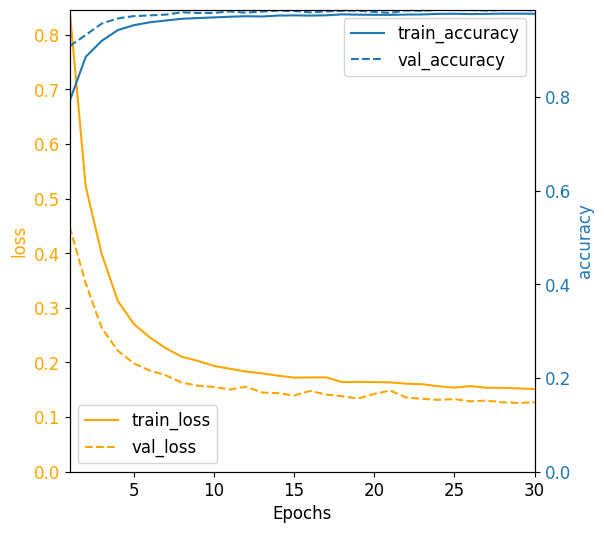

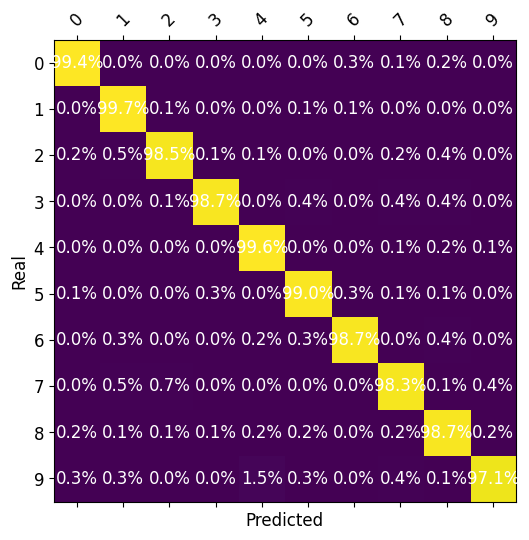

In [ ]:
# Modification of the LeNet-5 with L2 regularization and Dropout
from tensorflow.keras.regularizers import l2

def build_lenet5(input_shape=(32, 32, 1), output_class_count=10):
    model = keras.Sequential([
        layers.Input(shape=input_shape, name='Input'),
        layers.Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', padding='valid', name='C1', kernel_regularizer=l2(0.001)),
        layers.AvgPool2D(pool_size=2, strides=2, name='S2'),

        layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid', name='C3', kernel_regularizer=l2(0.001)),
        layers.AvgPool2D(pool_size=2, strides=2, name='S4'),

        layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid', name='C5', kernel_regularizer=l2(0.001)),
        layers.Flatten(),  # To obtain a vector
        layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        layers.Dense(84, activation='tanh', name='F6', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.5),  # Another Dropout layer
        layers.Dense(units=output_class_count, activation='softmax', name='Output')
    ])
    return model

model=build_lenet5( train_x[0].shape , class_count)

# Model compilation
#optimizer=keras.optimizers.SGD()
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Using Adam optimizer

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
batch_size=250
epoch_count=30 #20
patience=5

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

history =model.fit(train_x,train_y,batch_size,epoch_count,validation_data=(val_x,val_y),callbacks=[early_stop])

#Visualization of accuracy and loss over epochs
plot_history(history,metric='accuracy')

# Confusion matrix
test_conf_pred=model.predict(test_x)
test_y_pred=np.argsort(test_conf_pred,axis=1)[:,-1]# to select the class with the highest probability

conf_matrix=confusion_matrix(test_y, test_y_pred, normalize='true')
show_confusion_matrix(conf_matrix,class_names)

In [ ]:
# Scheduling of the learning rate

In [ ]:
# @title Hyperparameter tuning using kerastuner
!pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.regularizers import l2

def build_lenet5(hp):
    model = keras.Sequential([
        layers.Input(shape=(32, 32, 1), name='Input'),
        layers.Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', padding='valid', kernel_regularizer=l2(0.001)),
        layers.AvgPool2D(pool_size=2, strides=2),

        layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid', kernel_regularizer=l2(0.001)),
        layers.AvgPool2D(pool_size=2, strides=2),

        layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid', kernel_regularizer=l2(0.001)),

        layers.Flatten(),  # To obtain a vector
        layers.Dropout(0.5),  # Dropout layer to prevent overfitting

        layers.Dense(84, activation='tanh', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.5),  # Another Dropout layer

        layers.Dense(10, activation='softmax', name='Output')
    ])

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG'))
    elif optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG'))
    elif optimizer_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Set Up the Tuner
tuner = RandomSearch(
    build_lenet5,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='lenet5_tuning'
)

tuner.search_space_summary()

# PERFORM HYPERPARAMETER SEARCH
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(train_x, train_y, epochs=30, validation_data=(val_x, val_y), callbacks=[early_stop])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal optimizer is {best_hps.get('optimizer')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_x, train_y, epochs=30, validation_data=(val_x, val_y), callbacks=[early_stop])
plot_history(histor,metric='accuracy')

Search space summary
Default search space size: 2
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


NameError: name 'train_x' is not defined

When to Use `executions_per_trial`

	•	Use a higher value for executions_per_trial when you want more reliable and stable performance metrics at the cost of increased computational resources and time.
	•	Use a lower value (like 1) if you want faster tuning and are willing to accept more variability in the results.